# Projeto Individual M03 - Relatório de Progresso

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/VihProgramer/Projeto_Grupo_M3_Relatorios_Progesso/main/dados.csv'))
df

def calculate_statistics(df, columns, stats):
    statistics = {}
    for column in columns:
        column_stats = {}
        if 'sum' in stats:
            column_stats['SOMA'] = df[column].sum()
        if 'mean' in stats:
            column_stats['MÉDIA'] = df[column].mean()
        if 'median' in stats:
            column_stats['MEDIANA'] = df[column].median()
        statistics[column] = column_stats
    return statistics

def print_statistics(statistics):
    for column, stats in statistics.items():
        print(f'\n### Estatísticas para {column} ###')
        for stat_name, value in stats.items():
            print(f'{stat_name}: {value:.2f}' if isinstance(value, float) else f'{stat_name}: {value}')

def analyze_data(df, columns_to_analyze, stats_to_calculate):
    statistics = calculate_statistics(df, columns_to_analyze, stats_to_calculate)
    print_statistics(statistics)

def plot_bar_chart(df, config):
    plt.figure(figsize=(10, 6))

    plt.bar(df[config['x']], df[config['y']], color='violet')

    plt.title(config['title'])
    plt.xlabel(config['xlabel'])
    plt.ylabel(config['ylabel'])

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_line_chart(df, config):
    plt.figure(figsize=(10, 6))

    plt.plot(df[config['x']], df[config['y']], marker='o', linestyle='-', color='purple')

    plt.title(config['title'])
    plt.xlabel(config['xlabel'])
    plt.ylabel(config['ylabel'])

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_double_line_chart(df, config):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))

    sns.lineplot(x=config['x'], y=config['y1'], data=df, color='green', label=config['y1_label'], marker='o')
    sns.lineplot(x=config['x'], y=config['y2'], data=df, color='orange', label=config['y2_label'], marker='o')

    plt.title(config['title'])
    plt.xlabel(config['xlabel'])
    plt.ylabel(config['ylabel'])

    plt.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 📌 Transformação de Dados
A transformação de dados é fundamental para moldar os dados em um formato que simplifique a análise. Neste projeto, geramos novos dados a partir dos existentes para calcular métricas de produtividade, como bugs corrigidos por hora e tarefas concluídas por hora. Essas transformações permitem uma visualização e interpretação mais clara do desempenho da equipe ao longo da semana.

In [95]:
df['Bugs Corrigidos por Hora'] = (df['Bugs Corrigidos'] / df['Horas Trabalhadas']).round(2)
df['Tarefas Concluídas por Hora'] = (df['Tarefas Concluídas'] / df['Horas Trabalhadas']).round(2)

df

,Dia,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluídas,Bugs Corrigidos por Hora,Tarefas Concluídas por Hora
0,Segunda,6,3,5,0.50,0.83
1,Terça,7,2,4,0.29,0.57
2,Quarta,8,1,6,0.12,0.75
3,Quinta,6,4,4,0.67,0.67
4,Sexta,7,3,5,0.43,0.71
5,Sábado,5,2,3,0.40,0.60
6,Domingo,4,1,2,0.25,0.50


### 📌 Agregação de Dados

A agregação de dados permite consolidar informações, criando um conjunto de dados mais compacto e informativo. Observamos que a carga horária semanal de trabalho está abaixo das 44 horas regulamentares. Além disso, notamos que a equipe deu mais ênfase à implementação de novas funcionalidades (tarefas concluídas) do que à correção de bugs. Isso pode prejudicar a experiência do usuário se os bugs não forem devidamente priorizados.

In [96]:
columns_to_analyze = ['Horas Trabalhadas', 'Bugs Corrigidos', 'Tarefas Concluídas', 'Bugs Corrigidos por Hora', 'Tarefas Concluídas por Hora']
stats_to_calculate = ['sum', 'mean', 'median']
analyze_data(df, columns_to_analyze, stats_to_calculate)


### Estatísticas para Horas Trabalhadas ###
SOMA: 43
MÉDIA: 6.14
MEDIANA: 6.00

### Estatísticas para Bugs Corrigidos ###
SOMA: 16
MÉDIA: 2.29
MEDIANA: 2.00

### Estatísticas para Tarefas Concluídas ###
SOMA: 29
MÉDIA: 4.14
MEDIANA: 4.00

### Estatísticas para Bugs Corrigidos por Hora ###
SOMA: 2.66
MÉDIA: 0.38
MEDIANA: 0.40

### Estatísticas para Tarefas Concluídas por Hora ###
SOMA: 4.63
MÉDIA: 0.66
MEDIANA: 0.67


### 📌 Gráficos
A análise revela que parte do trabalho foi realizada nos finais de semana, sugerindo possíveis questões de gerenciamento de tempo ou pressão de prazos. A diminuição da produtividade no final da semana indica que o cansaço mental pode estar afetando o desempenho dos desenvolvedores, impactando negativamente as métricas de eficiência.

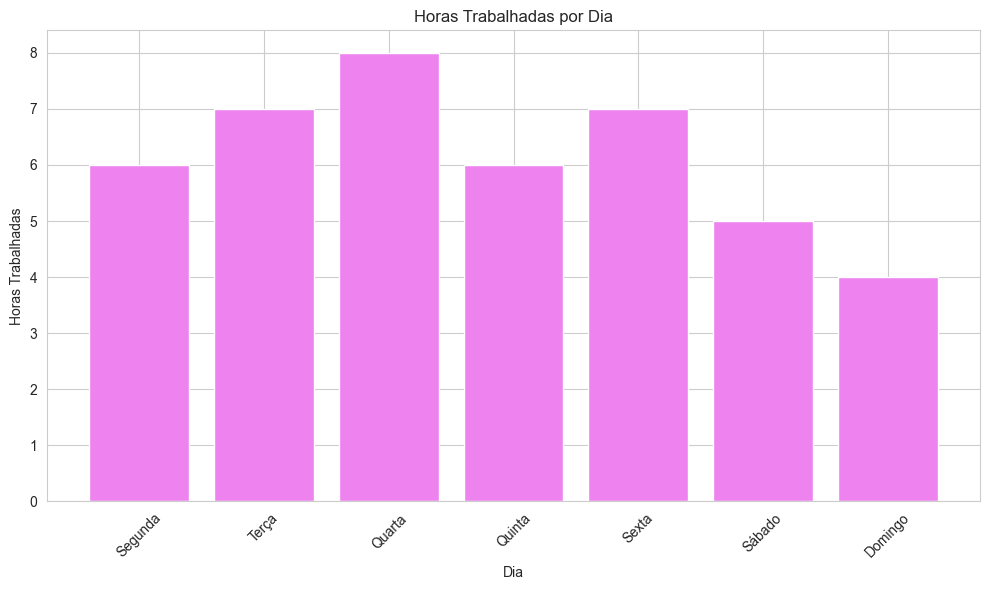

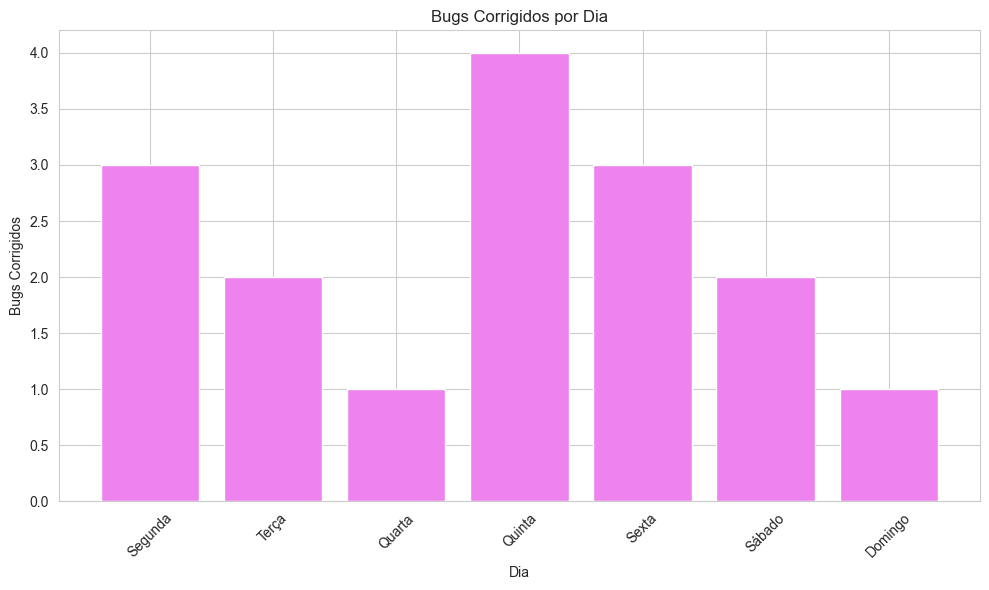

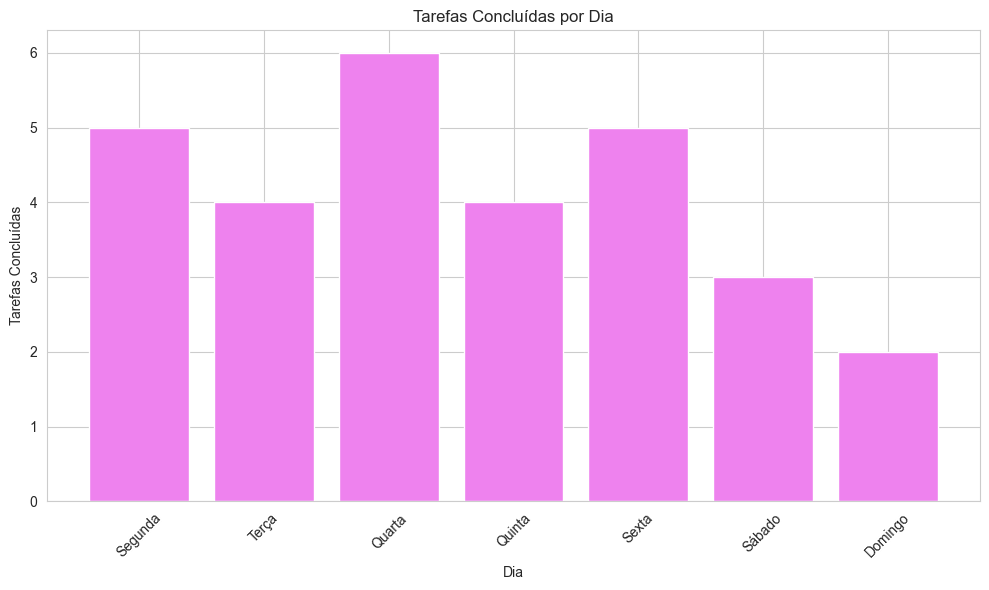

In [97]:
chart_configs = [
    {'type': 'bar', 'x': 'Dia', 'y': 'Horas Trabalhadas', 'title': 'Horas Trabalhadas por Dia', 'xlabel': 'Dia', 'ylabel': 'Horas Trabalhadas'},
    {'type': 'bar', 'x': 'Dia', 'y': 'Bugs Corrigidos', 'title': 'Bugs Corrigidos por Dia', 'xlabel': 'Dia', 'ylabel': 'Bugs Corrigidos'},
    {'type': 'bar', 'x': 'Dia', 'y': 'Tarefas Concluídas', 'title': 'Tarefas Concluídas por Dia', 'xlabel': 'Dia', 'ylabel': 'Tarefas Concluídas'}
]

for config in chart_configs:
    plot_bar_chart(df, config)

Esta variação indica o cansaço dos desenvolvedores, com um leve aumento na sexta-feira antes de um declínio no fim de semana. A análise da produtividade horária reforça a necessidade de equilibrar a carga de trabalho para manter uma eficiência constante e evitar a fadiga.

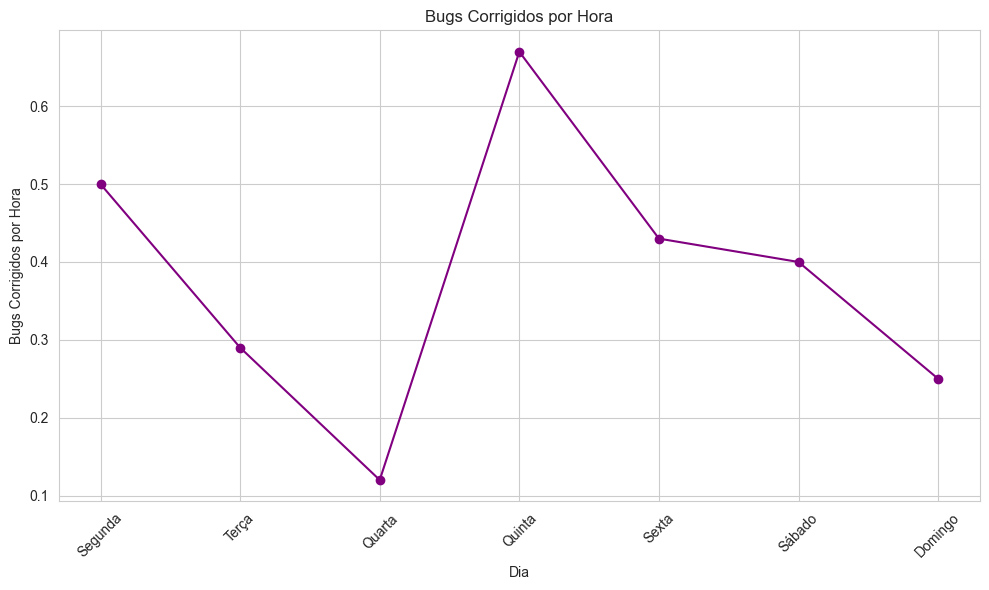

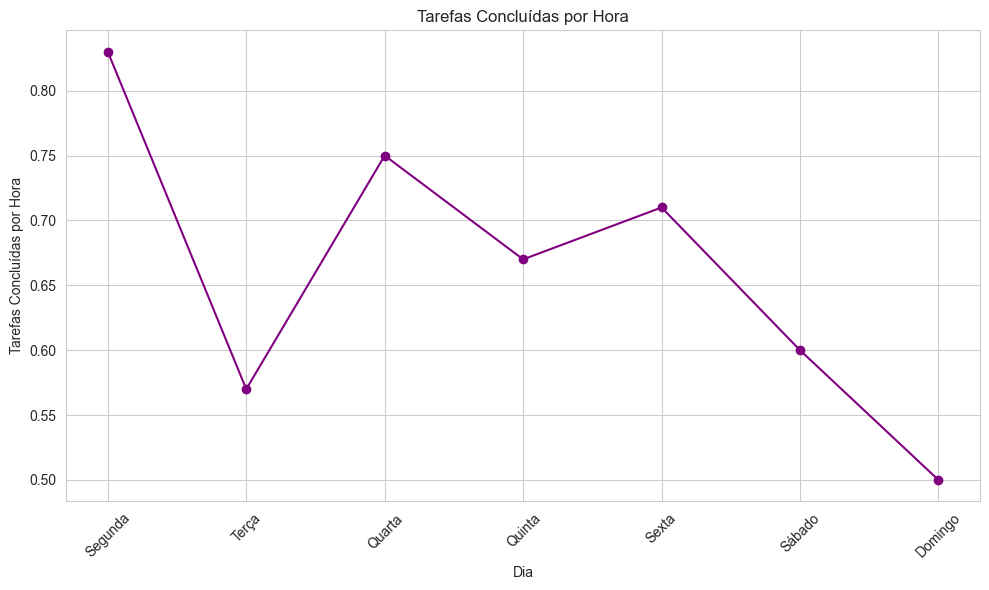

In [98]:
line_chart_configs = [
    {'type': 'line', 'x': 'Dia', 'y': 'Bugs Corrigidos por Hora', 'title': 'Bugs Corrigidos por Hora', 'xlabel': 'Dia', 'ylabel': 'Bugs Corrigidos por Hora'},
    {'type': 'line', 'x': 'Dia', 'y': 'Tarefas Concluídas por Hora', 'title': 'Tarefas Concluídas por Hora', 'xlabel': 'Dia', 'ylabel': 'Tarefas Concluídas por Hora'}
]

for config in line_chart_configs:
    plot_line_chart(df, config)

O gráfico de linha dupla revela um padrão semelhante entre as métricas de bugs corrigidos e tarefas concluídas, apresentando um aumento gradual até o meio da semana, seguido por uma leve queda. Isso sugere que os desenvolvedores equilibram a correção de bugs e a conclusão de novas tarefas de maneira consistente, embora o cansaço acumulado no final da semana impacte ambas as atividades.

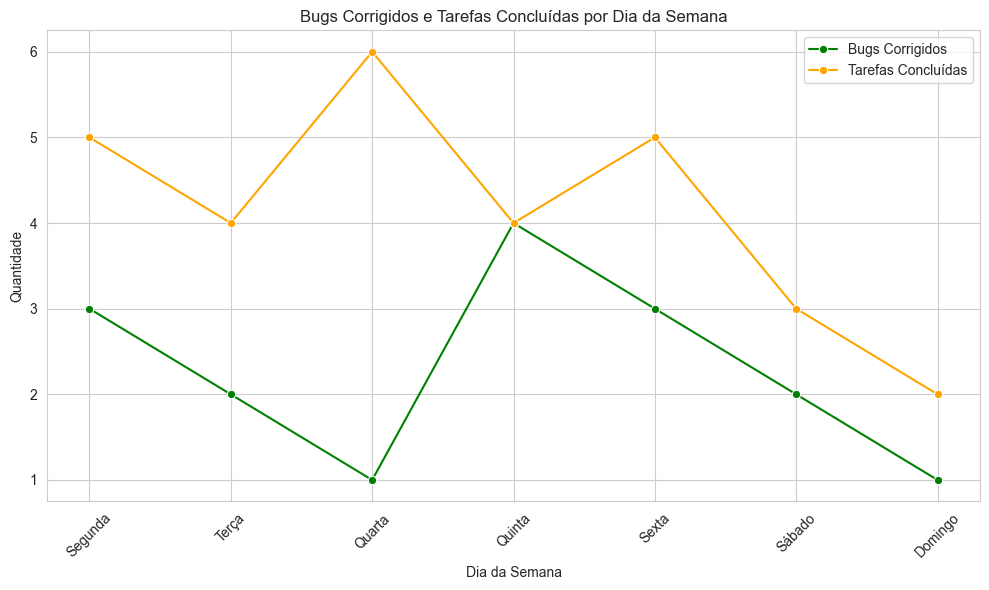

In [99]:
double_line_chart_config = {
    'x': 'Dia',
    'y1': 'Bugs Corrigidos',
    'y2': 'Tarefas Concluídas',
    'title': 'Bugs Corrigidos e Tarefas Concluídas por Dia da Semana',
    'xlabel': 'Dia da Semana',
    'ylabel': 'Quantidade',
    'y1_label': 'Bugs Corrigidos',
    'y2_label': 'Tarefas Concluídas'
}

plot_double_line_chart(df, double_line_chart_config)


### 📌 Perguntas e Respostas
- Total de Horas Trabalhadas: 43 horas
- Média de Horas Trabalhadas: 6.14 horas
- Total de Bugs Corrigidos: 16
- Média Diária de Bugs Corrigidos: 2.29
- Total de Tarefas Concluídas: 29
- Média Diária de Tarefas Concluídas: 4.14
- Produtividade Diária (Tarefas Concluídas por Hora): 0.66

### 📌 Conclusão
A análise dos dados revelou importantes insights sobre a carga de trabalho e a produtividade da equipe ao longo da semana. Os gráficos de barras mostraram uma distribuição desigual das horas trabalhadas, com um pico na quarta-feira e uma queda significativa no fim de semana, sugerindo problemas de gerenciamento de tempo e pressão de prazos. A variação na carga horária e a diminuição da produtividade no final da semana indicam que o cansaço mental dos desenvolvedores está afetando negativamente seu desempenho.

Os gráficos burndown indicaram um aumento da produtividade até o meio da semana, seguido por um declínio que se acentua no final de semana, reforçando a necessidade de um melhor equilíbrio na carga de trabalho para manter a eficiência e evitar a fadiga.

O gráfico de linha dupla destacou uma correlação entre bugs corrigidos e tarefas concluídas, mostrando que os desenvolvedores mantêm um equilíbrio consistente entre essas duas atividades. No entanto, o cansaço no final da semana impacta ambas as métricas, sugerindo a necessidade de ajustes na programação para mitigar esse efeito.